In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import style
from spotipy import util




## Create Spotify Object

In [ ]:
cid ="Your_Client_ID" 
secret = "Your_Secret"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
#Create Spotify object 
spotify = spotipy.Spotify()


In [92]:
#Get features of the audio file; such as danceability, valence etc
def get_audio_features(spotify,ids):
    """ Pass in a Series of Spotify song id's and returns a Dataframe"""

    print("Starting audio feature collection")
    music_features = pd.DataFrame(spotify.audio_features(ids))
    print("Finishe audio feature collection")
    return music_features

In [93]:
music_featurez = get_audio_features(sp,'ID')

Starting audio feature collection
Finishe audio feature collection


# Print out all my Playlists

In [ ]:
#Print out all playlist names
playlists = sp.user_playlists('Your-Spotify-username')
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

## Get all the tracks listed in a playlist

In [33]:
#Get track results from playlist based on the playlist ID
track_results = sp.user_playlist("Your-Spotify-username", "your-playlist-ID")

## Convert track results into a Pandas dataframe

In [39]:
df_tracks = pd.DataFrame([[t["track"]["id"], t["track"]["name"], t["track"]["artists"][0]["id"], 
                           t["track"]["artists"][0]["name"], t["track"]["album"]["name"], t["track"]["popularity"]] 
                          
                          for t in track_results['tracks']['items']],
                         
                         columns=["id", "song_name", "artist_id", "artist_name", "album_name", "popularity"]) 

## Normalize "Popularity" so it is on the same scale as other features

In [40]:
df_tracks["norm_popularity"] = df_tracks["popularity"] / 100.

df_tracks.head()

,id,song_name,artist_id,artist_name,album_name,popularity,norm_popularity
0,60jh7oiCKKmStpzm8uQPUa,Yours (Glory and Praise),3YCKuqpv9nCsIhJ2v8SMix,Elevation Worship,There Is a Cloud,53,0.53
1,0naheLc5o40oqBjxi1v4EI,I Will Exalt (feat. Amanda Cook),26T4yOaOoFJvUvxR87Y9HO,Bethel Music,Be Lifted High,47,0.47
2,3uWOS5d4UBE62UwvzvZNPF,Deep Cries Out,26T4yOaOoFJvUvxR87Y9HO,Bethel Music,Be Lifted High,46,0.46
3,6t4mncxgMmg2HhXdI4N8lY,It's A Wonderful World,602DnpaSXJB4b9DZrvxbDc,Peggy Lee,Things Are Swingin',11,0.11
4,4lD6Rr1Z7oNhKh0EtdCNpf,Here's My Heart - Live,6eJqAWJdd8JhAN1pQGie4r,Casting Crowns,A Live Worship Experience,52,0.52


# Plot artist frequency in my playlist

In [47]:
import plotly.plotly as py
import plotly.graph_objs as go

In [177]:
trace = go.Histogram(x=df_tracks['artist_name'])
data = [trace]
py.iplot(data)

C:\Users\Tobi\Anaconda2\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [61]:
df_tracks['artist_name'][:2]

0    Elevation Worship
1         Bethel Music
Name: artist_name, dtype: object

In [183]:
df_tracks.head()

,id,song_name,artist_id,artist_name,album_name,popularity,norm_popularity
0,60jh7oiCKKmStpzm8uQPUa,Yours (Glory and Praise),3YCKuqpv9nCsIhJ2v8SMix,Elevation Worship,There Is a Cloud,53,0.53
1,0naheLc5o40oqBjxi1v4EI,I Will Exalt (feat. Amanda Cook),26T4yOaOoFJvUvxR87Y9HO,Bethel Music,Be Lifted High,47,0.47
2,3uWOS5d4UBE62UwvzvZNPF,Deep Cries Out,26T4yOaOoFJvUvxR87Y9HO,Bethel Music,Be Lifted High,46,0.46
3,6t4mncxgMmg2HhXdI4N8lY,It's A Wonderful World,602DnpaSXJB4b9DZrvxbDc,Peggy Lee,Things Are Swingin',11,0.11
4,4lD6Rr1Z7oNhKh0EtdCNpf,Here's My Heart - Live,6eJqAWJdd8JhAN1pQGie4r,Casting Crowns,A Live Worship Experience,52,0.52


In [185]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
id                 79 non-null object
song_name          79 non-null object
artist_id          79 non-null object
artist_name        79 non-null object
album_name         79 non-null object
popularity         79 non-null int64
norm_popularity    79 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 4.4+ KB


In [58]:
df_tracks[:2]

,id,song_name,artist_id,artist_name,album_name,popularity,norm_popularity
0,60jh7oiCKKmStpzm8uQPUa,Yours (Glory and Praise),3YCKuqpv9nCsIhJ2v8SMix,Elevation Worship,There Is a Cloud,53,0.53
1,0naheLc5o40oqBjxi1v4EI,I Will Exalt (feat. Amanda Cook),26T4yOaOoFJvUvxR87Y9HO,Bethel Music,Be Lifted High,47,0.47


In [63]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
id                 79 non-null object
song_name          79 non-null object
artist_id          79 non-null object
artist_name        79 non-null object
album_name         79 non-null object
popularity         79 non-null int64
norm_popularity    79 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 4.4+ KB


In [74]:
df_tracks.iloc[[0],[1]]

,song_name
0,Yours (Glory and Praise)


## Print popular songs

In [77]:
for i in df_tracks['popularity']:
    try:
        if df_tracks['popularity'][i] >= 60:
            print(df_tracks['song_name'][i],df_tracks['popularity'][i])
    except Exception:
        pass
        


Everglow - Single Version; Radio Edit 63
Fall 67
Everglow - Single Version; Radio Edit 63
Everglow - Single Version; Radio Edit 63
Fall 67


In [95]:
def _get_features_df(sp, track_ids):
    """"
    This is a helper method to get track's features with pagination from track IDs.
    It returns a Pandas dataframe
    
    """
    
    feature_list = []
    i=0
    while track_ids:
        print("Call #{} for audio features",format(i+1))
        features_results = sp.audio_features(track_ids[:API_LIMIT])
        

In [96]:
len(df_tracks["artist_name"].unique())

57

In [97]:
#Save all the track IDs in a list that we will use as an argument in the get_audio_features method we created earlier
track_ids = df_tracks["id"].unique().tolist()

In [98]:
df_features = get_audio_features(sp,track_ids) # Save track IDs in a DF

Starting audio feature collection
Finishe audio feature collection


In [99]:
df_features.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.00145,https://api.spotify.com/v1/audio-analysis/60jh...,0.410,450333,0.596,60jh7oiCKKmStpzm8uQPUa,0.000000,2,0.689,-6.899,1,0.0356,139.913,4,https://api.spotify.com/v1/tracks/60jh7oiCKKmS...,audio_features,spotify:track:60jh7oiCKKmStpzm8uQPUa,0.136
1,0.44900,https://api.spotify.com/v1/audio-analysis/0nah...,0.319,404880,0.304,0naheLc5o40oqBjxi1v4EI,0.000000,2,0.149,-9.388,1,0.0327,147.016,3,https://api.spotify.com/v1/tracks/0naheLc5o40o...,audio_features,spotify:track:0naheLc5o40oqBjxi1v4EI,0.111
2,0.00214,https://api.spotify.com/v1/audio-analysis/3uWO...,0.427,314480,0.849,3uWOS5d4UBE62UwvzvZNPF,0.000000,0,0.441,-7.014,1,0.0482,150.039,4,https://api.spotify.com/v1/tracks/3uWOS5d4UBE6...,audio_features,spotify:track:3uWOS5d4UBE62UwvzvZNPF,0.273
3,0.71000,https://api.spotify.com/v1/audio-analysis/6t4m...,0.775,134200,0.389,6t4mncxgMmg2HhXdI4N8lY,0.000363,9,0.134,-8.902,0,0.0685,131.061,3,https://api.spotify.com/v1/tracks/6t4mncxgMmg2...,audio_features,spotify:track:6t4mncxgMmg2HhXdI4N8lY,0.471
4,0.54600,https://api.spotify.com/v1/audio-analysis/4lD6...,0.353,411733,0.363,4lD6Rr1Z7oNhKh0EtdCNpf,0.000000,11,0.961,-9.107,1,0.0333,160.668,4,https://api.spotify.com/v1/tracks/4lD6Rr1Z7oNh...,audio_features,spotify:track:4lD6Rr1Z7oNhKh0EtdCNpf,0.213


In [116]:
df_features.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.412430,0.499139,263864.582278,0.502044,0.036321,4.962025,0.228786,-8.298177,0.822785,0.064262,116.065089,3.810127,0.380210
std,0.318938,0.204012,79924.541749,0.215744,0.155926,3.767074,0.235578,3.464859,0.384291,0.068424,28.020945,0.621742,0.270709
min,0.000891,0.164000,114783.000000,0.030700,0.000000,0.000000,0.020200,-18.676000,0.000000,0.027400,68.329000,1.000000,0.040100
25%,0.085300,0.351500,210240.000000,0.325000,0.000000,1.000000,0.096650,-9.974500,1.000000,0.033400,97.254000,4.000000,0.156000
50%,0.396000,0.464000,249600.000000,0.501000,0.000000,5.000000,0.123000,-7.725000,1.000000,0.039000,114.488000,4.000000,0.312000
75%,0.715500,0.653500,297895.500000,0.658000,0.000173,9.000000,0.266500,-6.216000,1.000000,0.053700,136.631500,4.000000,0.586500
max,0.985000,0.928000,492827.000000,0.947000,0.907000,11.000000,0.971000,-2.310000,1.000000,0.438000,208.081000,5.000000,0.961000


## Normalize the "tempo" column

In [100]:
#Normalize the tempo so it's on the same scale as the other features
df_features['norm_tempo']= (df_features['tempo']-24)/176
df_features.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,norm_tempo
0,0.00145,https://api.spotify.com/v1/audio-analysis/60jh...,0.410,450333,0.596,60jh7oiCKKmStpzm8uQPUa,0.000000,2,0.689,-6.899,1,0.0356,139.913,4,https://api.spotify.com/v1/tracks/60jh7oiCKKmS...,audio_features,spotify:track:60jh7oiCKKmStpzm8uQPUa,0.136,0.658597
1,0.44900,https://api.spotify.com/v1/audio-analysis/0nah...,0.319,404880,0.304,0naheLc5o40oqBjxi1v4EI,0.000000,2,0.149,-9.388,1,0.0327,147.016,3,https://api.spotify.com/v1/tracks/0naheLc5o40o...,audio_features,spotify:track:0naheLc5o40oqBjxi1v4EI,0.111,0.698955
2,0.00214,https://api.spotify.com/v1/audio-analysis/3uWO...,0.427,314480,0.849,3uWOS5d4UBE62UwvzvZNPF,0.000000,0,0.441,-7.014,1,0.0482,150.039,4,https://api.spotify.com/v1/tracks/3uWOS5d4UBE6...,audio_features,spotify:track:3uWOS5d4UBE62UwvzvZNPF,0.273,0.716131
3,0.71000,https://api.spotify.com/v1/audio-analysis/6t4m...,0.775,134200,0.389,6t4mncxgMmg2HhXdI4N8lY,0.000363,9,0.134,-8.902,0,0.0685,131.061,3,https://api.spotify.com/v1/tracks/6t4mncxgMmg2...,audio_features,spotify:track:6t4mncxgMmg2HhXdI4N8lY,0.471,0.608301
4,0.54600,https://api.spotify.com/v1/audio-analysis/4lD6...,0.353,411733,0.363,4lD6Rr1Z7oNhKh0EtdCNpf,0.000000,11,0.961,-9.107,1,0.0333,160.668,4,https://api.spotify.com/v1/tracks/4lD6Rr1Z7oNh...,audio_features,spotify:track:4lD6Rr1Z7oNhKh0EtdCNpf,0.213,0.776523


In [101]:
#Add popularity to audio_features
df_features['popularity'] = df_tracks['norm_popularity']

In [105]:
df_features.head()

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,norm_tempo,popularity
0,0.00145,0.410,450333,0.596,60jh7oiCKKmStpzm8uQPUa,0.000000,2,0.689,-6.899,1,0.0356,139.913,4,0.136,0.658597,0.53
1,0.44900,0.319,404880,0.304,0naheLc5o40oqBjxi1v4EI,0.000000,2,0.149,-9.388,1,0.0327,147.016,3,0.111,0.698955,0.47
2,0.00214,0.427,314480,0.849,3uWOS5d4UBE62UwvzvZNPF,0.000000,0,0.441,-7.014,1,0.0482,150.039,4,0.273,0.716131,0.46
3,0.71000,0.775,134200,0.389,6t4mncxgMmg2HhXdI4N8lY,0.000363,9,0.134,-8.902,0,0.0685,131.061,3,0.471,0.608301,0.11
4,0.54600,0.353,411733,0.363,4lD6Rr1Z7oNhKh0EtdCNpf,0.000000,11,0.961,-9.107,1,0.0333,160.668,4,0.213,0.776523,0.52


## Drop columns we aren't using

In [104]:
df_features = df_features.drop(columns=["analysis_url","track_href","type","uri"])

KeyError: "['analysis_url' 'track_href' 'type' 'uri'] not found in axis"

In [108]:
df_features.head(10)

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,norm_tempo,popularity
0,0.00145,0.410,450333,0.596,60jh7oiCKKmStpzm8uQPUa,0.000000,2,0.6890,-6.899,1,0.0356,139.913,4,0.1360,0.658597,0.53
1,0.44900,0.319,404880,0.304,0naheLc5o40oqBjxi1v4EI,0.000000,2,0.1490,-9.388,1,0.0327,147.016,3,0.1110,0.698955,0.47
2,0.00214,0.427,314480,0.849,3uWOS5d4UBE62UwvzvZNPF,0.000000,0,0.4410,-7.014,1,0.0482,150.039,4,0.2730,0.716131,0.46
3,0.71000,0.775,134200,0.389,6t4mncxgMmg2HhXdI4N8lY,0.000363,9,0.1340,-8.902,0,0.0685,131.061,3,0.4710,0.608301,0.11
4,0.54600,0.353,411733,0.363,4lD6Rr1Z7oNhKh0EtdCNpf,0.000000,11,0.9610,-9.107,1,0.0333,160.668,4,0.2130,0.776523,0.52
5,0.72100,0.757,176107,0.293,7ElBZMkV9zo3pZa4byNu2c,0.770000,5,0.0202,-13.253,0,0.0529,107.166,4,0.8570,0.472534,0.36
6,0.03840,0.720,175427,0.791,2Dz8KeCYs9awlwUJStJlmh,0.000000,1,0.1570,-4.689,1,0.1240,102.071,4,0.7560,0.443585,0.49
7,0.39600,0.522,210027,0.608,3H0lUzkLfMS8GNbR2UDJBN,0.000311,4,0.1120,-11.583,1,0.0374,79.975,4,0.5090,0.318040,0.27
8,0.26200,0.280,316400,0.288,2ix8Hwk9ZeNAmGE66vyPze,0.000024,10,0.0724,-10.296,1,0.0299,81.607,5,0.1420,0.327313,0.42
9,0.06150,0.289,492827,0.531,0m9tzAbMTRXMlzByJf82z3,0.000000,2,0.5260,-7.597,1,0.0340,74.549,4,0.0943,0.287210,0.01


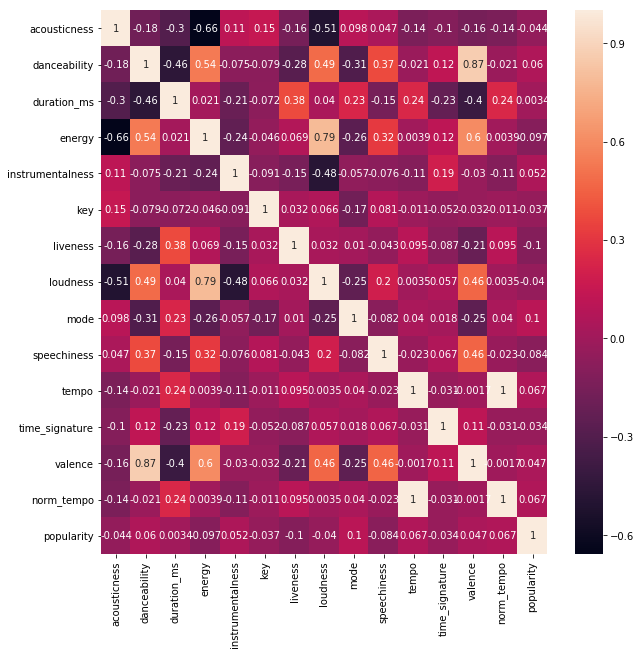

In [109]:
fig, ax =plt.subplots(figsize=(10,10))  
sns.heatmap(df_features.corr(), annot=True, ax=ax)

# Data exploratory analysis on my favourite Spotify playlist with Seaborn 

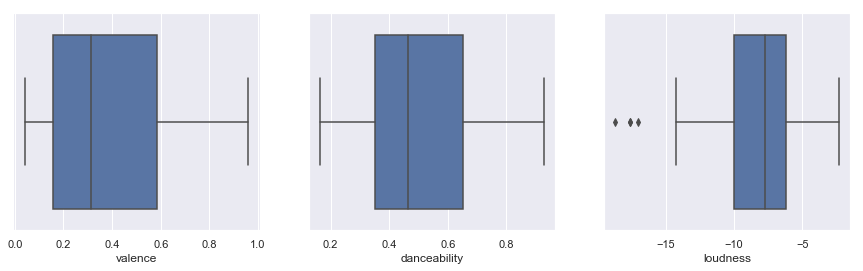

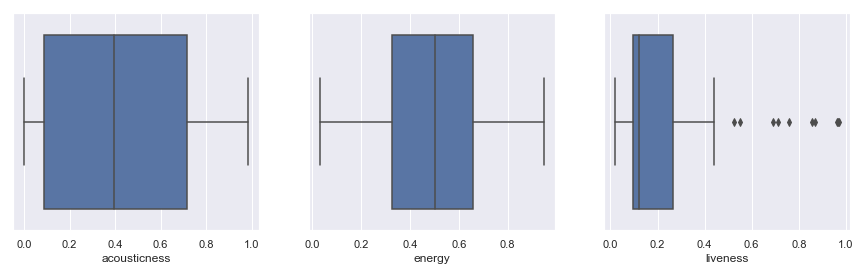

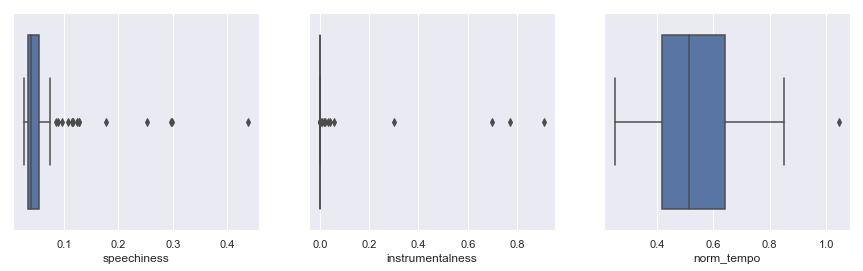

In [110]:
sns.set() # Used to set the default seaborn theme, scaling and colour pallete 
f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))

#sns.boxplot(x="day", y="tip", data=tips, ax=axes[0])

#sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=axes[1])

sns.boxplot(df_features['valence'], ax=axes[0])
sns.boxplot(df_features['danceability'], ax=axes[1])
sns.boxplot(df_features['loudness'], ax=axes[2])

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
sns.boxplot(df_features['acousticness'], ax=axes[0])
sns.boxplot(df_features['energy'], ax=axes[1])
sns.boxplot(df_features['liveness'], ax=axes[2])

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
sns.boxplot(df_features['speechiness'], ax=axes[0])
sns.boxplot(df_features['instrumentalness'], ax=axes[1])
sns.boxplot(df_features['norm_tempo'], ax=axes[2])
plt.show()


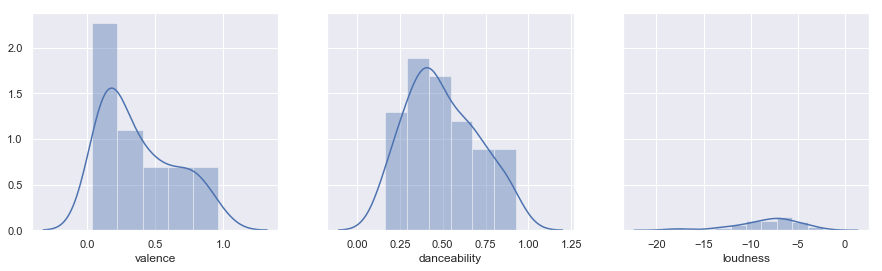

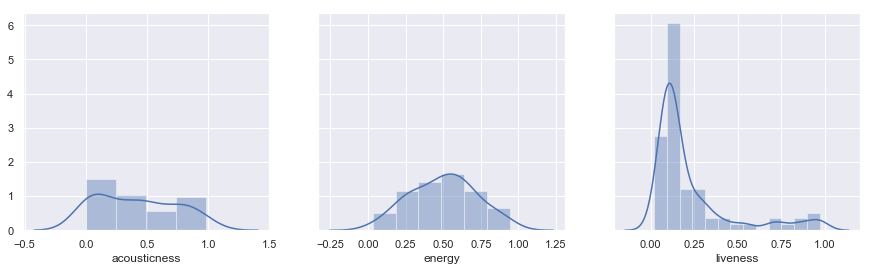

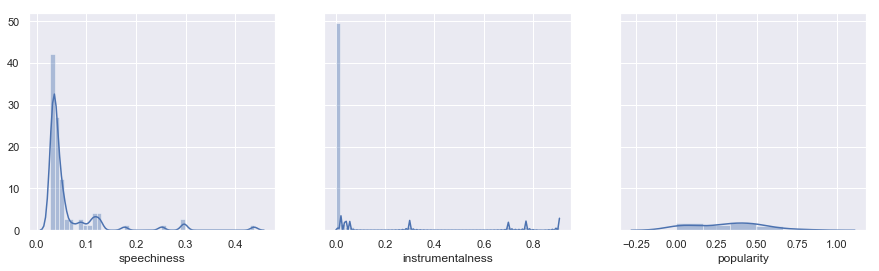

In [115]:
f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))

#sns.distplot(df_features['energy'], ax=axes[0])
#sns.distplot(df_features['norm_tempo'], ax=axes[2]) 

sns.distplot(df_features['valence'], ax=axes[0])
sns.distplot(df_features['danceability'], ax=axes[1])
sns.distplot(df_features['loudness'], ax=axes[2])

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
sns.distplot(df_features['acousticness'], ax=axes[0])
sns.distplot(df_features['energy'], ax=axes[1])
sns.distplot(df_features['liveness'], ax=axes[2])

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
sns.distplot(df_features['speechiness'], ax=axes[0])
sns.distplot(df_features['instrumentalness'], ax=axes[1])
sns.distplot(df_features['popularity'], ax=axes[2]) 
plt.show()

In [139]:
df_features.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,norm_tempo,popularity
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.412430,0.499139,263864.582278,0.502044,0.036321,4.962025,0.228786,-8.298177,0.822785,0.064262,116.065089,3.810127,0.380210,0.523097,0.316962
std,0.318938,0.204012,79924.541749,0.215744,0.155926,3.767074,0.235578,3.464859,0.384291,0.068424,28.020945,0.621742,0.270709,0.159210,0.212231
min,0.000891,0.164000,114783.000000,0.030700,0.000000,0.000000,0.020200,-18.676000,0.000000,0.027400,68.329000,1.000000,0.040100,0.251869,0.000000
25%,0.085300,0.351500,210240.000000,0.325000,0.000000,1.000000,0.096650,-9.974500,1.000000,0.033400,97.254000,4.000000,0.156000,0.416216,0.115000
50%,0.396000,0.464000,249600.000000,0.501000,0.000000,5.000000,0.123000,-7.725000,1.000000,0.039000,114.488000,4.000000,0.312000,0.514136,0.340000
75%,0.715500,0.653500,297895.500000,0.658000,0.000173,9.000000,0.266500,-6.216000,1.000000,0.053700,136.631500,4.000000,0.586500,0.639952,0.480000
max,0.985000,0.928000,492827.000000,0.947000,0.907000,11.000000,0.971000,-2.310000,1.000000,0.438000,208.081000,5.000000,0.961000,1.045915,0.830000


# Import top Spotify songs from 2018

In [186]:
top2018_df = pd.read_csv('top2018.csv')

In [187]:
top2018_df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [188]:
top2018_df = top2018_df.drop('duration_ms', axis=1)

In [189]:
top2018_df = top2018_df.drop(columns="time_signature")

In [190]:
top2018_df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030


## Analyze Spotify's top songs in 2018

### Plot frequency of artists appearing in the top 100 charts

In [131]:
trace4 = go.Histogram(x=top2018_df['artists'])
data4 = [trace4]
py.iplot(data4)

C:\Users\Tobi\Anaconda2\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [191]:
#View infomration on the 4th item in our dataset 
top2018_df.iloc[4]

id                  2G7V7zsVDxg1yRsu7Ew9R
name                       In My Feelings
artists                             Drake
danceability                        0.835
energy                              0.626
key                                     1
loudness                           -5.833
mode                                    1
speechiness                         0.125
acousticness                       0.0589
instrumentalness                    6e-05
liveness                            0.396
valence                              0.35
tempo                               91.03
Name: 4, dtype: object

## See artists who appread most in the top 100


In [184]:
#See artists who appread most in the top 100
top2018_df['artists'].value_counts().head(4)

Post Malone     6
XXXTENTACION    6
Drake           4
Marshmello      3
Name: artists, dtype: int64

In [142]:
trace5 = go.Histogram(x=top2018_df['key'])
data5 = [trace5]
py.iplot(data5)

C:\Users\Tobi\Anaconda2\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [136]:
top2018_df['name']

0                                            God's Plan
1                                                  SAD!
2                            rockstar (feat. 21 Savage)
3                          Psycho (feat. Ty Dolla $ign)
4                                        In My Feelings
5                                            Better Now
6                                             I Like It
7                              One Kiss (with Dua Lipa)
8                                                 IDGAF
9                                               FRIENDS
10                                               Havana
11                                         Lucid Dreams
12                                        Nice For What
13                       Girls Like You (feat. Cardi B)
14                                           The Middle
15                             All The Stars (with SZA)
16                                 no tears left to cry
17                                              

## Audio Features of the Top 100 Songs

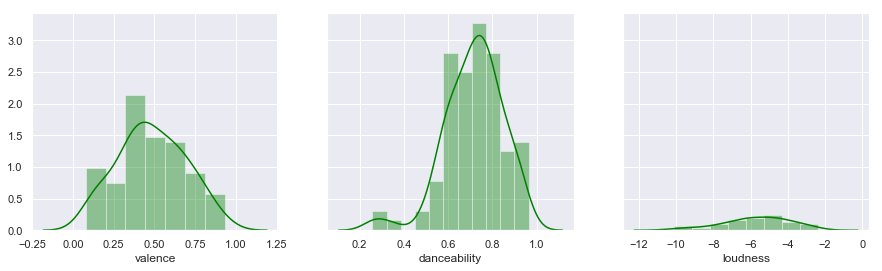

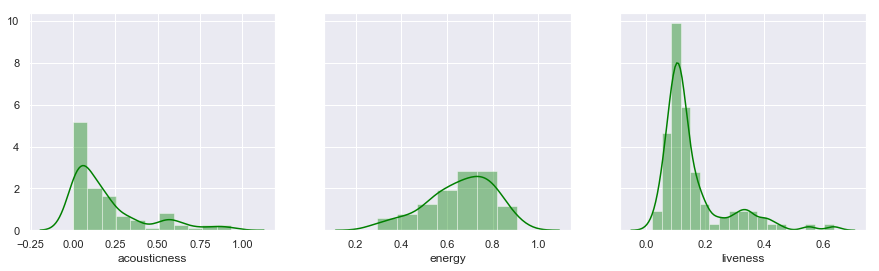

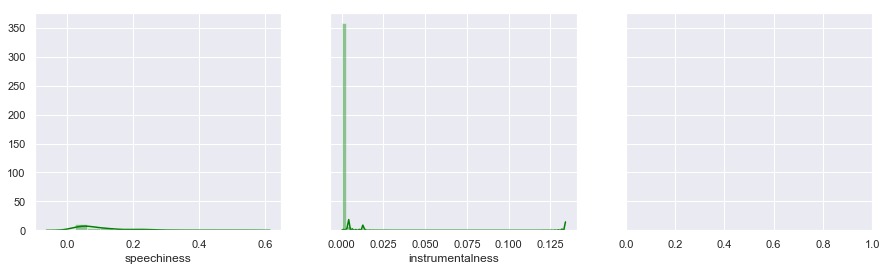

In [138]:
f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))

sns.distplot(top2018_df['valence'], ax=axes[0], color='green')
sns.distplot(top2018_df['danceability'], ax=axes[1],color='green')
sns.distplot(top2018_df['loudness'], ax=axes[2],color='green')

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
sns.distplot(top2018_df['acousticness'], ax=axes[0],color='green')
sns.distplot(top2018_df['energy'], ax=axes[1],color='green')
sns.distplot(top2018_df['liveness'], ax=axes[2],color='green')

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
sns.distplot(top2018_df['speechiness'], ax=axes[0],color='green')
sns.distplot(top2018_df['instrumentalness'], ax=axes[1],color='green')
plt.show()

## Correlation between audio features

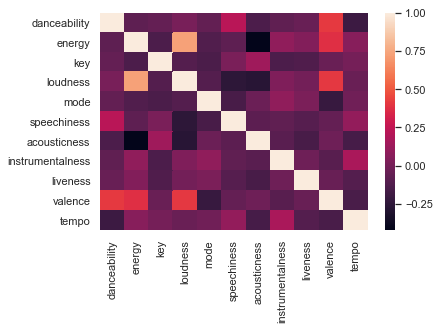

In [182]:
sns.heatmap(top2018_df.corr())

## Radar Charts of Top 100 Songs

In [176]:
data6 = [go.Scatterpolar(
  r = [valence_avg, dance_avg, acoustic_avg, energy_avg, speech_avg, liveness_avg],
  theta = ['Valence','Danceability','Acousticness', 'Energy', 'Speechiness','Liveness'],
  fill = 'toself'
), go.Scatterpolar(
      r = [valence_avg2, dance_avg2, acoustic_avg2, energy_avg2, speech_avg2, liveness_avg2],
      theta = ['Valence','Danceability','Acousticness', 'Energy', 'Speechiness','Liveness'],
      fill = 'toself',
      name = 'Group B'
    )]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0.00, 1.00]
    )
  ),
  showlegend = False
)

fig = go.Figure(data=data6, layout=layout)
py.iplot(fig, filename = "basic_radar")

C:\Users\Tobi\Anaconda2\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Get average of all songs to plot on Radar Chart

In [170]:
dance_avg = top2018_df['danceability'].mean()
speech_avg =top2018_df['speechiness'].mean()
acoustic_avg =top2018_df['acousticness'].mean()
energy_avg =top2018_df['energy'].mean()
liveness_avg =top2018_df['liveness'].mean()
valence_avg =top2018_df['valence'].mean()

In [175]:
dance_avg2 = df_features['danceability'].mean()
speech_avg2 =df_features['speechiness'].mean()
acoustic_avg2 =df_features['acousticness'].mean()
energy_avg2 =df_features['energy'].mean()
liveness_avg2 =df_features['liveness'].mean()
valence_avg2 =df_features['valence'].mean()